**2021 Lindoscope workshop**

<p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/Lindoscope.png?raw=True'/></p>

In [249]:
# @title Install dependencies
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import math


### Import the data from the local directory
Go to the file containg the excel trained data and paste the directory in the path

In [250]:
######### Importing the data
path = r'C:\Users\shossein\Desktop\LINdoscope_Pupile'
path_Preprocessed = r'C:\Users\shossein\Desktop\LINdoscope_Pupile\Preprocessed' # use your path

######################### Training Data
all_training = glob.glob(path + "/*.csv")

li = []

for filename in all_training:
    df_training = pd.read_csv(filename, index_col=None, header=2)
    li.append(df_training)

frame_training = pd.concat(li, axis=0, ignore_index=True)
# frame_training
######################### Camera & laser analogue
all_analogue = glob.glob(path + "/*.xlsx")

ii = []

for filename in all_analogue:
    df_analogue = pd.read_excel(filename,  sheet_name = 1, header=0)
    ii.append(df_analogue)

frame_analogue = pd.concat(ii, axis=1, ignore_index=False)
# frame_analogue

In [251]:
frame_training

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2,x.3,y.3,likelihood.3
0,0,51.539436,50.458736,1.0,70.985924,68.854515,1.0,54.901432,67.441025,1,71.606117,52.700699,1.0
1,1,51.676701,50.458736,1.0,71.209717,68.902336,1.0,55.033825,67.860214,1,71.606117,52.700699,1.0
2,2,51.693649,50.508247,1.0,71.640778,68.902336,1.0,55.046814,67.926384,1,71.696617,52.826401,1.0
3,3,52.294704,50.544144,1.0,71.659767,68.925812,1.0,55.859158,68.090508,1,71.696617,52.826401,1.0
4,4,52.340118,50.961292,1.0,71.950325,68.902336,1.0,56.188580,68.301399,1,71.696617,52.869705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,53.911865,48.581707,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.579956,46.727303,1.0
12596,12596,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12597,12597,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12598,12598,53.790089,48.614117,1.0,77.553185,70.764114,1.0,54.299030,70.568237,1,78.428055,46.671974,1.0


### Preprocess the data
To clean the data we have to first get rid of small liklihood

In [252]:
############   preprocessing the data

threshold = 0.7 # to accept the coordinate

training_filtered = frame_training[(frame_training["likelihood"] >= threshold) # Filtering all concatenated training data
         &  (frame_training["likelihood.1"] >= threshold)
         &  (frame_training["likelihood.2"] >= threshold)
         &  (frame_training["likelihood.3"] >= threshold)] # filtered dataframe

In [253]:
training_filtered

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2,x.3,y.3,likelihood.3
0,0,51.539436,50.458736,1.0,70.985924,68.854515,1.0,54.901432,67.441025,1,71.606117,52.700699,1.0
1,1,51.676701,50.458736,1.0,71.209717,68.902336,1.0,55.033825,67.860214,1,71.606117,52.700699,1.0
2,2,51.693649,50.508247,1.0,71.640778,68.902336,1.0,55.046814,67.926384,1,71.696617,52.826401,1.0
3,3,52.294704,50.544144,1.0,71.659767,68.925812,1.0,55.859158,68.090508,1,71.696617,52.826401,1.0
4,4,52.340118,50.961292,1.0,71.950325,68.902336,1.0,56.188580,68.301399,1,71.696617,52.869705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,53.911865,48.581707,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.579956,46.727303,1.0
12596,12596,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12597,12597,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12598,12598,53.790089,48.614117,1.0,77.553185,70.764114,1.0,54.299030,70.568237,1,78.428055,46.671974,1.0


### Calculating the Eucleadian Distance
In mathematics, the Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, 
therefore occasionally being called the Pythagorean distance

In [254]:
# EXERCISE_3: Difine a function for Eucleadian Distance
#################################################
## a function
# raise NotImplementedError("Calculate the Eucleadian Distance")
#################################################
def calculateDistance(x1,y1,x2,y2):

    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return dist


[*Click for solution*](https://github.com/TeamPrigge/Lindoscope/blob/main/Excercise_3.py)



In [255]:
result_right_left = []
result_top_bottom = []
for i in range (len(training_filtered["x.1"])):
    x=training_filtered["x"][i]    #top
    y=training_filtered["y"][i]    #top
    x1=training_filtered["x.1"][i] #bottom
    y1=training_filtered["y.2"][i]  #bottom
    top_bottom = calculateDistance(x,y,x1,y1)
    result_top_bottom.append(top_bottom)

    x2=training_filtered["x.2"][i]    #left
    y2=training_filtered["y.2"][i]    #left
    x3=training_filtered["x.3"][i]   #right
    y3=training_filtered["y.3"][i]   #right
    right_left = calculateDistance(x2,y2,x3,y3)
    result_right_left.append(right_left)
    

### Getting the number of TTL applied
we set a threshold to calculate the number of TTL----> there are approximately 5 to 6 data points for each TTL

In [338]:
# # plt.plot(frame_analogue.iloc[2420:2450,4])

# for local maxima to find the peaks of camera fps
stack = np.array(frame_analogue.iloc[:,4]) # column for camera
prev = stack[0]
thresh = 4 # threshold to detect the peak
peaks = []

for num, i in enumerate(stack[1:], 1):
    if i> thresh:
        peaks.append(num)
    prev = i 

print(np.size(peaks))
print(np.size(peaks)/5) # approximate number of TTL 


62987
12597.4


### Plotting some figures
Now we plot the Pupil diameter and compare that to the stimulation paradigme

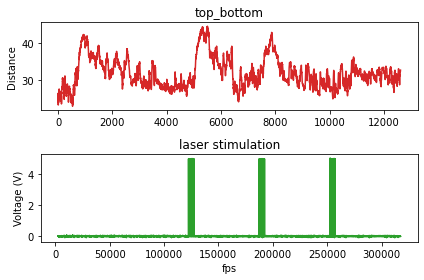

In [335]:
fig, ax = plt.subplots(2)


ax[0].plot(result_top_bottom, 'tab:red' ) # top_bottom distance for pupilometry
ax[0].set_title('top_bottom') 
ax[0].set_ylabel('Distance') 

ax[1].plot(frame_analogue.iloc[peaks[0]:peaks[-1],1], 'tab:green') # laser stimulation == index 1(ai1)
ax[1].set_title('laser stimulation')
ax[1].set_ylabel('Voltage (V)')
ax[1].set_xlabel('fps')


fig.tight_layout()



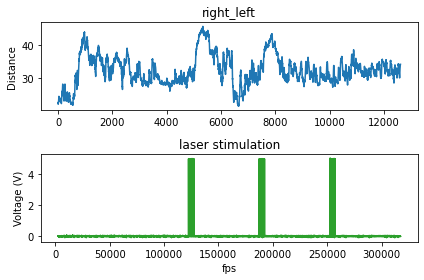

In [336]:

fig, ax = plt.subplots(2)

ax[0].plot(result_right_left, 'tab:blue') # right_left distance for pupilometry
ax[0].set_title('right_left')
ax[0].set_ylabel('Distance') 

ax[1].plot(frame_analogue.iloc[peaks[0]:peaks[-1],1], 'tab:green') # laser stimulation == index 1(ai1)
ax[1].set_title('laser stimulation')
ax[1].set_ylabel('Voltage (V)')
ax[1].set_xlabel('fps')

fig.tight_layout()

### Looking at some extra traces from camera and animal distance


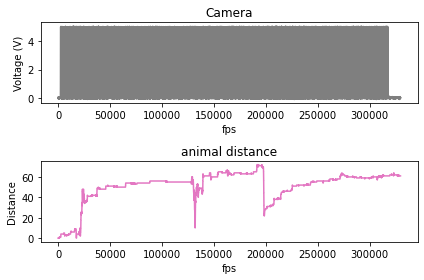

In [339]:
fig, ax = plt.subplots(2)

ax[0].plot(frame_analogue.iloc[:,4], 'tab:gray') # Camera frequency
ax[0].set_title('Camera')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_xlabel('fps') 

ax[1].plot(frame_analogue.iloc[:,6], 'tab:pink') # animal distance
ax[1].set_title('animal distance')
ax[1].set_ylabel('Distance')
ax[1].set_xlabel('fps')

fig.tight_layout()